# Fraud Detection

The dataset is available at https://www.kaggle.com/mlg-ulb/creditcardfraud

## Importing libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import *

import warnings
warnings.filterwarnings('ignore')

# Importing Data and Cleaning

In [2]:
df = pd.read_csv('transaction_dataset.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df = df.rename(columns = {'nameOrig' : 'origin', 'oldbalanceOrg' : 'sender_old_balance', 'newbalanceOrig': 'sender_new_balance', 'nameDest' : 'destination', 'oldbalanceDest' : 'receiver_old_balance', 'newbalanceDest': 'receiver_new_balance', 'isFraud' : 'isfraud'})

In [10]:
df = df.drop(columns = ['step', 'isFlaggedFraud'], axis = 'columns')

In [11]:
cols = df.columns.tolist()
new_position = 3

cols.insert(new_position, cols.pop(cols.index('destination')))
df = df[cols]

In [12]:
df

,type,amount,origin,destination,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud
0,PAYMENT,9839.64,C1231006815,M1979787155,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,C1666544295,M2044282225,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,C1305486145,C553264065,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,C840083671,C38997010,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,C2048537720,M1230701703,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,C776919290,339682.13,0.00,0.00,339682.13,1
6362616,TRANSFER,6311409.28,C1529008245,C1881841831,6311409.28,0.00,0.00,0.00,1
6362617,CASH_OUT,6311409.28,C1162922333,C1365125890,6311409.28,0.00,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,C1685995037,C2080388513,850002.52,0.00,0.00,0.00,1


# Exploratory Data Analysis

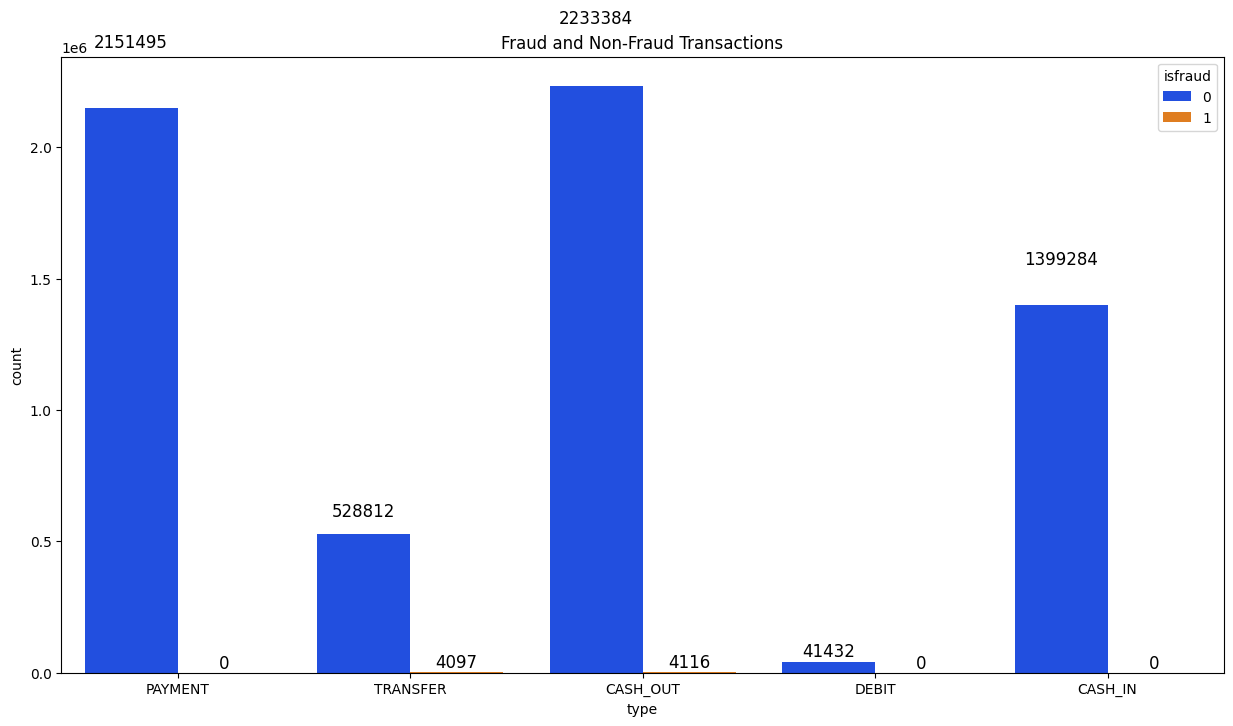

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df, x='type', hue='isfraud', palette='bright')
plt.title('Fraud and Non-Fraud Transactions')

# add annotations to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1*height,
            '{:.0f}'.format(height), ha='center', va='bottom', fontsize=12)

plt.show()


In [14]:
df_transfer = df[((df['type']=='TRANSFER') & df['isfraud']==1)]
df_transfer['origin'].value_counts()

C1305486145    1
C202278158     1
C12585107      1
C946427395     1
C1069177491    1
              ..
C2090764492    1
C1794935564    1
C318078280     1
C939293281     1
C1685995037    1
Name: origin, Length: 4097, dtype: int64

In [15]:
df_cash_out = df[(df['type'] == 'CASH_OUT') & (df['isfraud'] == 1)]
df_cash_out['destination'].value_counts()

C200064275     2
C1399829166    2
C1650668671    2
C2129197098    2
C1013511446    2
              ..
C1566713324    1
C1955464150    1
C1104137869    1
C377165949     1
C873221189     1
Name: destination, Length: 4091, dtype: int64

In [16]:
df_trans = df[df['isfraud'] == 1]
valid_trans = df[df['isfraud'] == 0]

trans_transfer = df[df['type'] == 'TRANSER']
trans_cashout = df[df['type'] == 'CASH_OUT']

print('Has the receiving accoung used for cashing out?')
trans_transfer.destination.isin(trans_cashout.origin).any()

Has the receiving accoung used for cashing out?


False

## Feature Engineering

In [17]:
data = df.copy()

In [18]:
data.head()

,type,amount,origin,destination,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud
0,PAYMENT,9839.64,C1231006815,M1979787155,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,C1666544295,M2044282225,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,C1305486145,C553264065,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,C840083671,C38997010,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,C2048537720,M1230701703,41554.0,29885.86,0.0,0.0,0


> Now we are going to see the number of fraud and valid transactions according to the type 2 that tells if the transaction was done from customer to customer, customer to merchant, merchant to customer or merchant to merchant.

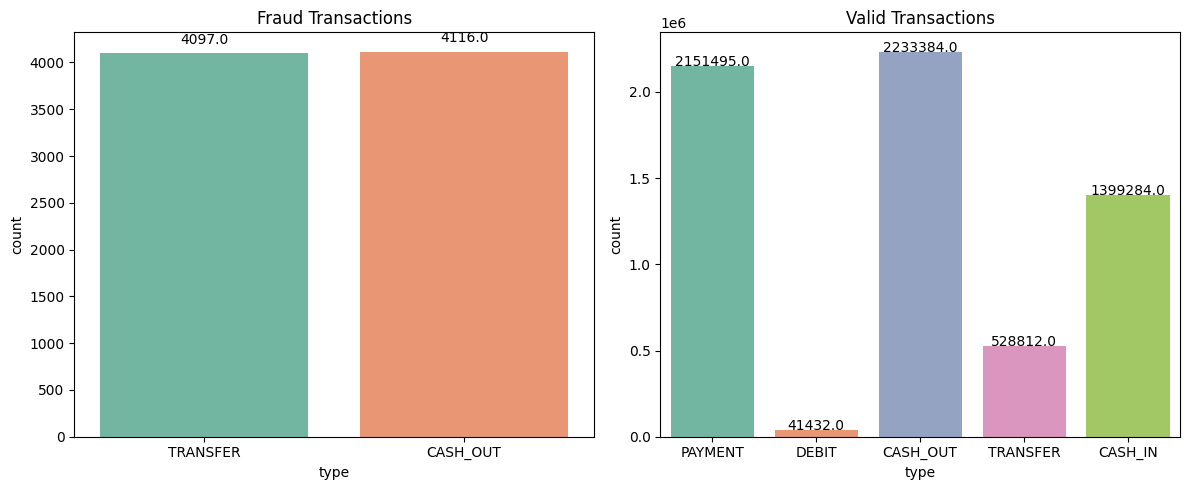

In [19]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

# Plot for fraud transactions
fraud_trans = df[df['isfraud'] == 1]
sns.countplot(data=fraud_trans, x='type', palette='Set2', ax=axs[0])
axs[0].set_title('Fraud Transactions')
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x()+p.get_width()/2., height+100, '{:.1f}'.format(height), ha='center')

# Plot for valid transactions
valid_trans = df[df['isfraud'] == 0]
sns.countplot(data=valid_trans, x='type', palette='Set2', ax=axs[1])
axs[1].set_title('Valid Transactions')
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x()+p.get_width()/2., height+100, '{:.1f}'.format(height), ha='center')

plt.tight_layout()
plt.show()


## Data Visualization

In [20]:
fr = fraud_trans.type.value_counts()
va = valid_trans.type.value_counts()

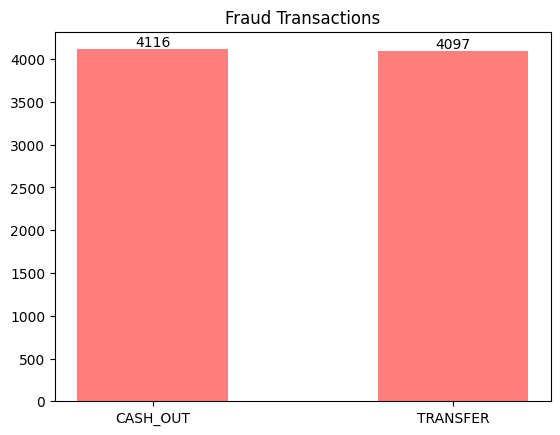

In [21]:
plt.bar(x=fr.index, height=fr, label='Fraud', color='red', alpha=0.5, width=0.5)
plt.title('Fraud Transactions')
for i, v in enumerate(fr.values):
    plt.text(i, v, str(v), color='black', ha='center', va='bottom')
plt.show()

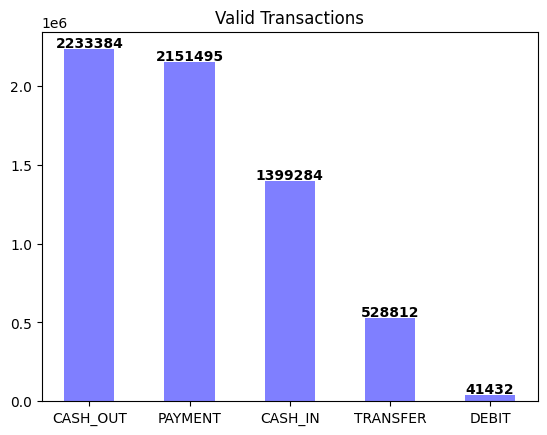

In [22]:
plt.bar(x=va.index, height=va, label='Valid', color='blue', alpha=0.5, width=0.5)
plt.title('Valid Transactions')
for i, v in enumerate(va):
    plt.text(i, v+10000, str(v), ha='center', fontweight='bold')
plt.show()

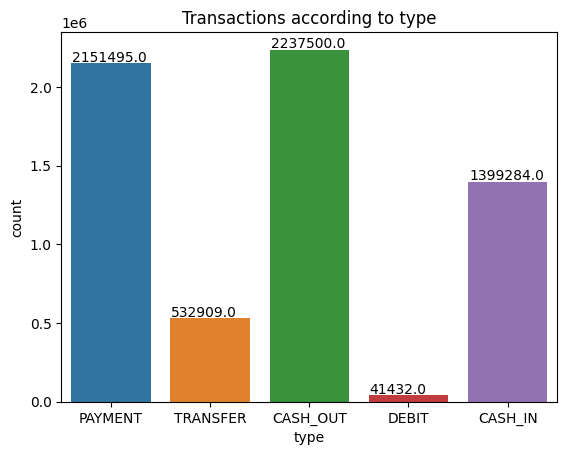

In [23]:
ax=sns.countplot(data = data, x = "type")
plt.title('Transactions according to type')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))
plt.show()

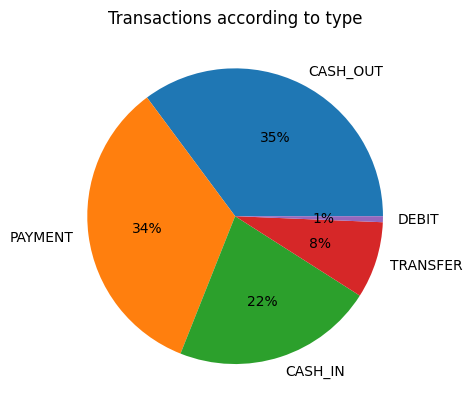

In [24]:
plt.pie(data.type.value_counts().values,labels=data.type.value_counts().index, autopct='%.0f%%')
plt.title("Transactions according to type")
plt.show()

## Data Preprocessing

In [25]:
data

,type,amount,origin,destination,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud
0,PAYMENT,9839.64,C1231006815,M1979787155,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,C1666544295,M2044282225,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,C1305486145,C553264065,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,C840083671,C38997010,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,C2048537720,M1230701703,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,C776919290,339682.13,0.00,0.00,339682.13,1
6362616,TRANSFER,6311409.28,C1529008245,C1881841831,6311409.28,0.00,0.00,0.00,1
6362617,CASH_OUT,6311409.28,C1162922333,C1365125890,6311409.28,0.00,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,C1685995037,C2080388513,850002.52,0.00,0.00,0.00,1


In [26]:
data = df.copy()

In [27]:
data = pd.get_dummies(data, columns=['type'], drop_first=True)
data = data.drop(['origin', 'destination'], axis=1)

In [28]:
data

,amount,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,1,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,1,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,1


In [29]:
X = data.drop('isfraud', 1)
y = data.isfraud

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = data.isfraud)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building

In [30]:
rfc=RandomForestClassifier(n_estimators = 15, n_jobs = -1, random_state = 0)
lgbm = LGBMClassifier(boosting_type = 'gbdt',objective = 'binary', random_state = 0)
xgbr = xgb.XGBClassifier(max_depth = 3, n_jobs = -1, random_state = 0, learning_rate = 0.1)
logreg = LogisticRegression(solver = 'liblinear', random_state = 0)

rfc.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
logreg.fit(X_train, y_train)

classifiers = []
classifiers.append(rfc)
classifiers.append(lgbm)
classifiers.append(xgbr)
classifiers.append(logreg)

In [31]:
accuracy_list = []
auc_list = []

for classifier in classifiers:
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[:,1]
    accuracy_list.append(accuracy_score(y_test, y_pred))
    auc_list.append(roc_auc_score(y_test, y_pred_proba))

accuracy_dict = {}
auc_dict = {}
for i in range(4):
    key=['Random Forest', 'Light GBM', 'XGBoost','LR'][i]
    accuracy_dict[key] = accuracy_list[i]
    auc_dict[key] = auc_list[i]
    
accuracy_dict_sorted = dict(sorted(accuracy_dict.items(), key = lambda item: item[1]))
auc_dict_sorted = dict(sorted(auc_dict.items(), key = lambda item: item[1]))

In [32]:
def px_bar(x,y,text,title,color,color_discrete_sequence):
    return px.bar(x = x, y = y, text = text, title = title, color = color, color_discrete_sequence=color_discrete_sequence)

In [33]:
fig = px_bar(list(accuracy_dict_sorted.keys()), list(accuracy_dict_sorted.values()), np.round(list(accuracy_dict_sorted.values()),3), 'Accuracy score of each classifiers', list(accuracy_dict_sorted.keys()), px.colors.sequential.matter)
for idx in [2,3]:
    fig.data[idx].marker.line.width = 3
    fig.data[idx].marker.line.color = "black"
fig.show()

In [34]:
fig = px_bar(list(auc_dict_sorted.keys()), list(auc_dict_sorted.values()), np.round(list(auc_dict_sorted.values()),3), 'AUC score of each classifiers', list(auc_dict_sorted.keys()), px.colors.sequential.matter)

for idx in [2,3]:
    fig.data[idx].marker.line.width = 3
    fig.data[idx].marker.line.color = "black"
fig.show()

## Model Evaluation

In [35]:
rfc=RandomForestClassifier(n_estimators = 15, n_jobs = -1, random_state = 42)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
rfc_pred_proba = rfc.predict_proba(X_test)[:,1]

In [36]:
print(classification_report(y_test, rfc_pred, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1906322
       Fraud       0.96      0.80      0.87      2464

    accuracy                           1.00   1908786
   macro avg       0.98      0.90      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



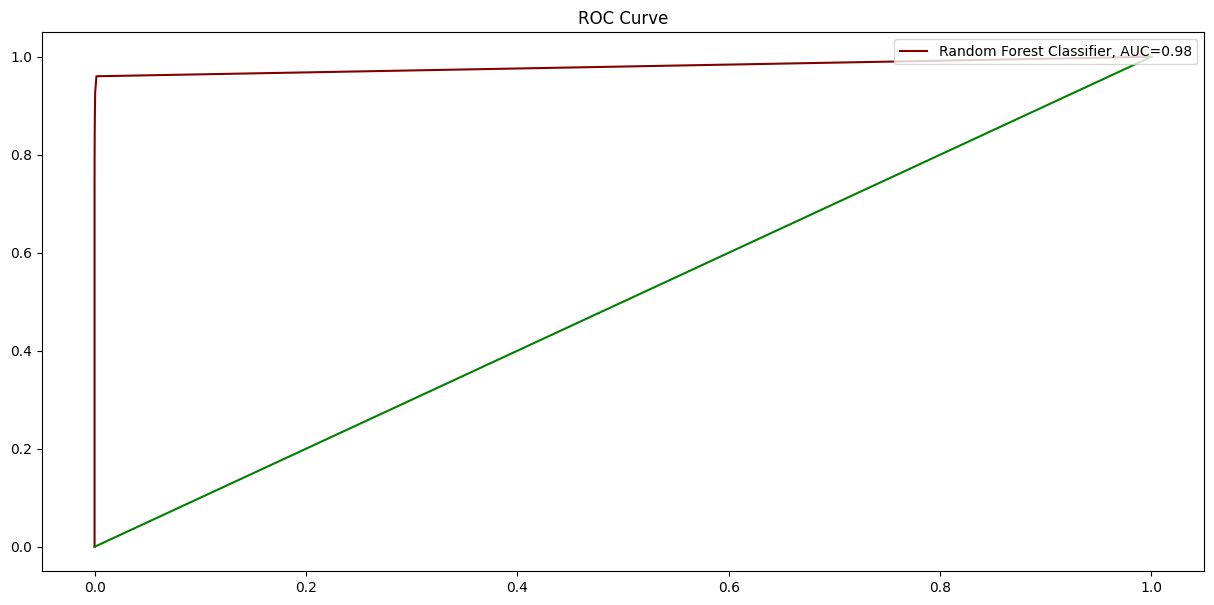

In [37]:
fpr, tpr, temp = roc_curve(y_test, rfc_pred_proba)
auc = round(roc_auc_score(y_test, rfc_pred_proba),3)
plt.figure(figsize=(15,7))
plt.plot(fpr,tpr,label='Random Forest Classifier, AUC='+str(auc),linestyle='solid',color='#800000')
plt.plot([0, 1], [0, 1], color = 'g')
plt.title('ROC Curve')
plt.legend(loc='upper right')

## Conclusion

Based on the given classification report, the model has performed well in predicting non-fraudulent transactions with an accuracy of 100%. However, the model has relatively low recall (sensitivity) for identifying fraudulent transactions, which indicates that there is a possibility of missing some fraudulent transactions. The model has a high precision for predicting fraudulent transactions, indicating that most of the predicted fraud transactions are actually fraudulent. Overall, the model has a good F1 score for predicting fraudulent transactions. It is important to note that this conclusion is based on the given data and the model may need further evaluation on unseen data to ensure its effectiveness in real-world scenarios.

The total number of fraud transactions were 8213 out of 6362620 transactions. These fraud transactions were either CASH_OUT or DEBIT and were made from a Customer to Customer account. We trained 4 algorithms and Random Forest performed the best among them. It gave the AUC score of 0.9. We can further improve the model by using more data and by using more algorithms.